In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numbers

In [ ]:
class MyLinearRegression():
	def __init__(self, thetas, alpha=0.001, max_iter=10000):
		if  not isinstance(thetas, np.ndarray) or not isinstance(alpha, float) or not isinstance(max_iter, int):
			print("Error Init 1")
			return
		elif thetas.size <= 0 or alpha <= 0 or max_iter <= 0:
			print("Error Init 2")
			return
		elif thetas.ndim != 2 or thetas.shape[1] != 1:
			print("Error Init 3")
			return
		self.thetas = thetas
		self.alpha = alpha
		self.max_iter = max_iter
	
	def zscore(self, x):
		if not isinstance(x, np.ndarray):
			return
		elif x.size <= 0 or x.ndim != 2:
			return
		return (x - x.mean()) / x.std()

	def minmax(self, x, x_min=None, x_max=None):
		if not isinstance(x, np.ndarray):
			return
		elif x.size <= 0 or x.ndim != 2:
			return
		if x_min is None or x_max is None:
			x_min = x.min(axis=0)
			x_max = x.max(axis=0)	

		return (x - x_min) / (x_max - x_min), x_min, x_max

	def predict_(self, x):
		if not isinstance(x, np.ndarray) or not isinstance(self.thetas, np.ndarray):
			return
		elif x.size <= 0 or self.thetas.size <= 0:
			return
		elif x.ndim != 2 or self.thetas.ndim != 2:
			return

		m, n = x.shape

		X_Prime = np.hstack((np.ones((m, 1)), x))

		if self.thetas.shape != (n + 1, 1):
			return

		return X_Prime @ self.thetas
	
	def mse_(self, y, y_hat):
		if not isinstance(y, np.ndarray) or not isinstance(y_hat, np.ndarray):
			return
		if y.size <= 0 or y_hat.size <= 0:
			return
		if y.ndim != 2 or y_hat.ndim != 2 or y.ndim != y_hat.ndim:
			return
		m = y.shape[0]

		error = y_hat - y

		return (1 / m) * (error.T @ error)

	def mae_(self, y, y_hat):
		if not isinstance(y, np.ndarray) or not isinstance(y_hat, np.ndarray):
			return
		if y.size <= 0 or y_hat.size <= 0:
			return
		if y.ndim != 2 or y_hat.ndim != 2 or y.ndim != y_hat.ndim:
			return
		m = y.shape[0]

		return (1 / m) * np.sum(np.abs(y_hat - y))
		
	def rmse_(self, y, y_hat):
		if not isinstance(y, np.ndarray) or not isinstance(y_hat, np.ndarray):
			return
		if y.size <= 0 or y_hat.size <= 0:
			return
		if y.ndim != 2 or y_hat.ndim != 2 or y.ndim != y_hat.ndim:
			return
		return np.sqrt(self.mse_(y, y_hat))
	
	def percentile_error_(self, rmse, y):
		if not isinstance(y, np.ndarray) or not isinstance(rmse, float):
			return
		if y.size <= 0 or y.ndim != 2:
			return

		return (rmse / y.mean()) * 100

	def std_var_benchmark(self, rmse, y):
		if not isinstance(y, np.ndarray) or not isinstance(rmse, float):
			return
		if y.size <= 0 or y.ndim != 2:
			return

		y_std = y.std()
		print(f"Y Standard Variation = {y_std}")
		print(f"RMSE = {rmse}")
		if rmse == 0:
			return
		print(f"Y Standard Variation / RMSE = {y_std / rmse}")
		return

	def r2_score_(self, y, y_hat):
		if not isinstance(y, np.ndarray) or not isinstance(y_hat, np.ndarray):
			return
		if y.size <= 0 or y_hat.size <= 0:
			return
		if y.ndim != 2 or y_hat.ndim != 2 or y.ndim != y_hat.ndim:
			return

		error = y_hat - y
		ss_res = np.sum(error ** 2)

		ss_tot = np.sum((y - y.mean()) ** 2)

		if ss_tot == 0:
			return 0.0

		return 1 - (ss_res / ss_tot)

	def fit_(self, x, y):
		if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray) or not isinstance(self.thetas, np.ndarray):
			print("Error: Fit 1")
			return
		elif x.size <= 0 or y.size <= 0 or self.thetas.size <= 0:
			print("Error: Fit 2")
			return
		elif x.ndim != 2 or y.ndim != 2 or self.thetas.ndim != 2:
			print("Error: Fit 3")
			return
		m, n = x.shape
		if y.shape != (m, 1) or self.thetas.shape != (n + 1, 1):
			print("Error: Fit 4")
			return

		self.thetas = self.thetas.astype(np.float64)
		
		for _ in range(self.max_iter):
			y_hat = self.predict_(x)

			error = y_hat - y

			X_Prime = np.hstack((np.ones((m, 1)), x))

			gradient = (1 / m) * (X_Prime.T @ error)

			self.thetas -= self.alpha * gradient


In [160]:
def add_polynomial_features(x, power):
	if not isinstance(x, np.ndarray) or not isinstance(power, int):
		return
	if x.size <= 0 or x.ndim != 2:
		return

	X_Pow = x.copy()

	for i in range(power):
		if (i > 0):
			X_Pow = np.hstack((X_Pow, pow(x, i + 1)))
	
	return X_Pow

In [161]:
def data_spliter(x, y, proportion):
	if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray) or not isinstance(proportion, float):
		return
	if x.size <= 0 or y.size <= 0 or proportion <= 0.0 or proportion >= 1.0:
		return
	if x.ndim != 2 or y.ndim != 2:
		return
	if x.shape[0] != y.shape[0] or y.shape[1] != 1:
		return
	
	rng = np.random.default_rng(42)
	indices = np.arange(x.shape[0])
	rng.shuffle(indices)
	X_shuffled = x[indices]
	Y_shuffled = y[indices]

	trainingSet = int(x.shape[0] * proportion)

	X_trainset = X_shuffled[:trainingSet]
	Y_trainset = Y_shuffled[:trainingSet]
	X_testing = X_shuffled[trainingSet:]
	Y_testing = Y_shuffled[trainingSet:]

	return (X_trainset, X_testing, Y_trainset, Y_testing)

(4900, 3)
(4900, 1)


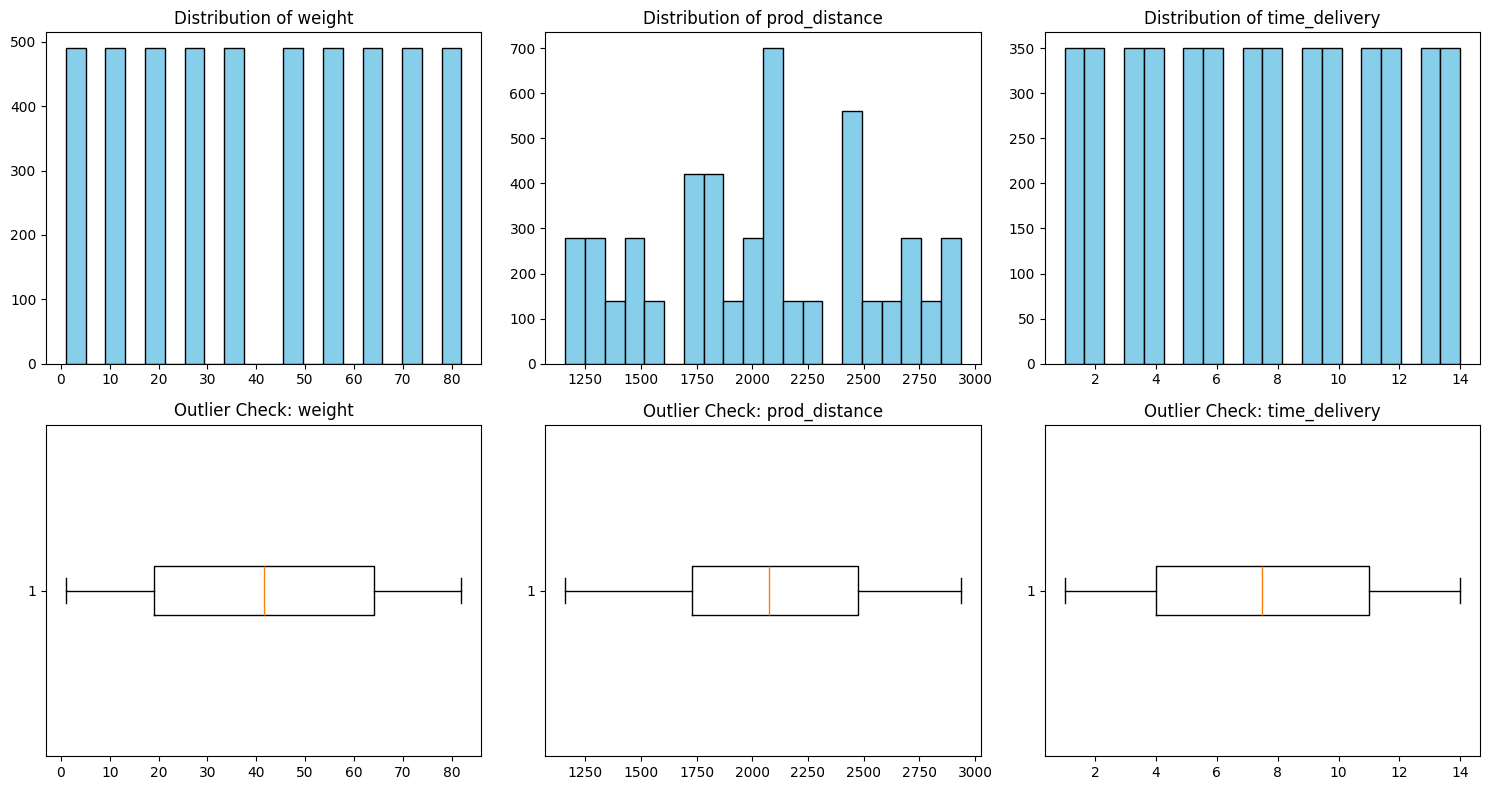

In [162]:
#Extracting Dataset into numpy array and splitting them between X and Y
dataset = np.array(pd.read_csv("space_avocado.csv"))

X = dataset[:, 1:-1:]
Y = dataset[:, -1].reshape(-1, 1)
print(X.shape)
print(Y.shape)

#Analyzing Dataset Distribution to pick the right normalization algorithm
features = ['weight', 'prod_distance', 'time_delivery']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(features):
    # Histogram - Checking for shape/distribution
    axes[0, i].hist(X[:, i], bins=20, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'Distribution of {col}')
    
    # Boxplot - Checking for OUTLIERS
    axes[1, i].boxplot(X[:, i], vert=False)
    axes[1, i].set_title(f'Outlier Check: {col}')

plt.tight_layout()
plt.show()
#No apparent Outlier => we will use Minmax normalization algorithm

In [163]:

#Split Dataset into training (80%) and testing set (20%)
X_train, X_test, Y_train, Y_test = data_spliter(X, Y, 0.8)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

#Create a template model to use normalization method
model = MyLinearRegression(np.ones(2).reshape(-1, 1))

#Create 4 polynomial training/testing set from degree 1 to 4
X_train_poly_1, x_min_1, x_max_1 = model.minmax(X_train.copy())
X_train_poly_2, x_min_2, x_max_2 = model.minmax(add_polynomial_features(X_train, 2))
X_train_poly_3, x_min_3, x_max_3 = model.minmax(add_polynomial_features(X_train, 3))
X_train_poly_4, x_min_4, x_max_4 = model.minmax(add_polynomial_features(X_train, 4))
print(X_train_poly_4.shape)

#Save min/max Training values to create continuous dataset later
x_mins = [x_min_1, x_min_2, x_min_3, x_min_4]
x_maxs = [x_max_1, x_max_2, x_max_3, x_max_4]

#We use the saved min/max values of training Set to normalize testing set
X_test_poly_1, x_min_test, x_max_test = model.minmax(X_test.copy(), x_min_1, x_max_1)
X_test_poly_2, _, _ = model.minmax(add_polynomial_features(X_test, 2), x_min_2, x_max_2)
X_test_poly_3, _, _ = model.minmax(add_polynomial_features(X_test, 3), x_min_3, x_max_3)
X_test_poly_4, _, _ = model.minmax(add_polynomial_features(X_test, 4), x_min_4, x_max_4)
print(X_test_poly_4.shape)

(3920, 3) (980, 3)
(3920, 1) (980, 1)
(3920, 12)
(980, 12)


In [164]:
""""""""""""""""""""""""""""""""""""""""""""""""""
"""					TRAINING				   """
""""""""""""""""""""""""""""""""""""""""""""""""""

#Create Random Thetas (Normal distribution, mean of 0, standard deviation of 0.01)
thetas_1 = np.random.normal(0, 0.01, size=X_train_poly_1.shape[1] + 1).reshape(-1, 1)

#Train Model 1 (Using Training set)
pm_1 = MyLinearRegression(thetas_1, 0.1, max_iter=1000000)
pm_1.fit_(X_train_poly_1, Y_train)

In [165]:
#Create Random Thetas (Normal distribution, mean of 0, standard deviation of 0.01)
thetas_2 = np.random.normal(0, 0.01, size=X_train_poly_2.shape[1] + 1).reshape(-1, 1)

#Train Model 2 (Using Training set)
pm_2 = MyLinearRegression(thetas_2, 0.1, max_iter=1000000)
pm_2.fit_(X_train_poly_2, Y_train)

In [166]:
#Create Random Thetas (Normal distribution, mean of 0, standard deviation of 0.01)
thetas_3 = np.random.normal(0, 0.01, size=X_train_poly_3.shape[1] + 1).reshape(-1, 1)

#Train Model 3 (Using Training set)
pm_3 = MyLinearRegression(thetas_3, 0.1, max_iter=1000000)
pm_3.fit_(X_train_poly_3, Y_train)

In [167]:
#Create Random Thetas (Normal distribution, mean of 0, standard deviation of 0.01)
thetas_4 = np.random.normal(0, 0.01, size=X_train_poly_4.shape[1] + 1).reshape(-1, 1)

#Train Model 4 (Using Training set)
pm_4 = MyLinearRegression(thetas_4, 0.1, max_iter=1000000)
pm_4.fit_(X_train_poly_4, Y_train)

In [168]:

""""""""""""""""""""""""""""""""""""""""""""""""""
"""				SETUP VISUALIATION		   	   """
""""""""""""""""""""""""""""""""""""""""""""""""""

#Prepare Data for clean visualisation

#Group Models and X/Y Sets and Prepare Colors for visualisation
models = [pm_1, pm_2, pm_3, pm_4]
degrees = [1, 2, 3, 4]

train_set = [X_train_poly_1, X_train_poly_2, X_train_poly_3, X_train_poly_4]

test_set = [X_test_poly_1, X_test_poly_2, X_test_poly_3, X_test_poly_4]

dataset = [train_set, test_set]
Y_set = [Y_train, Y_test]

colors_data_1 = ["#1900FF", "#F74E00", "#7700E7", "#058F00"]
colors_data_2 = ["#41B9FF", "#FFC17B", "#EC1FD1", "#25FF6E"]


Set: Training Set
Model Degree 1: 31237.77700008688
Model Degree 2: 13008.02983784876
Model Degree 3: 7669.592828919181
Model Degree 4: 3705.3859615293204
Set: Testing Set
Model Degree 1: 32582.44122944933
Model Degree 2: 13461.562996754943
Model Degree 3: 7907.141889020802
Model Degree 4: 3822.4256654090254


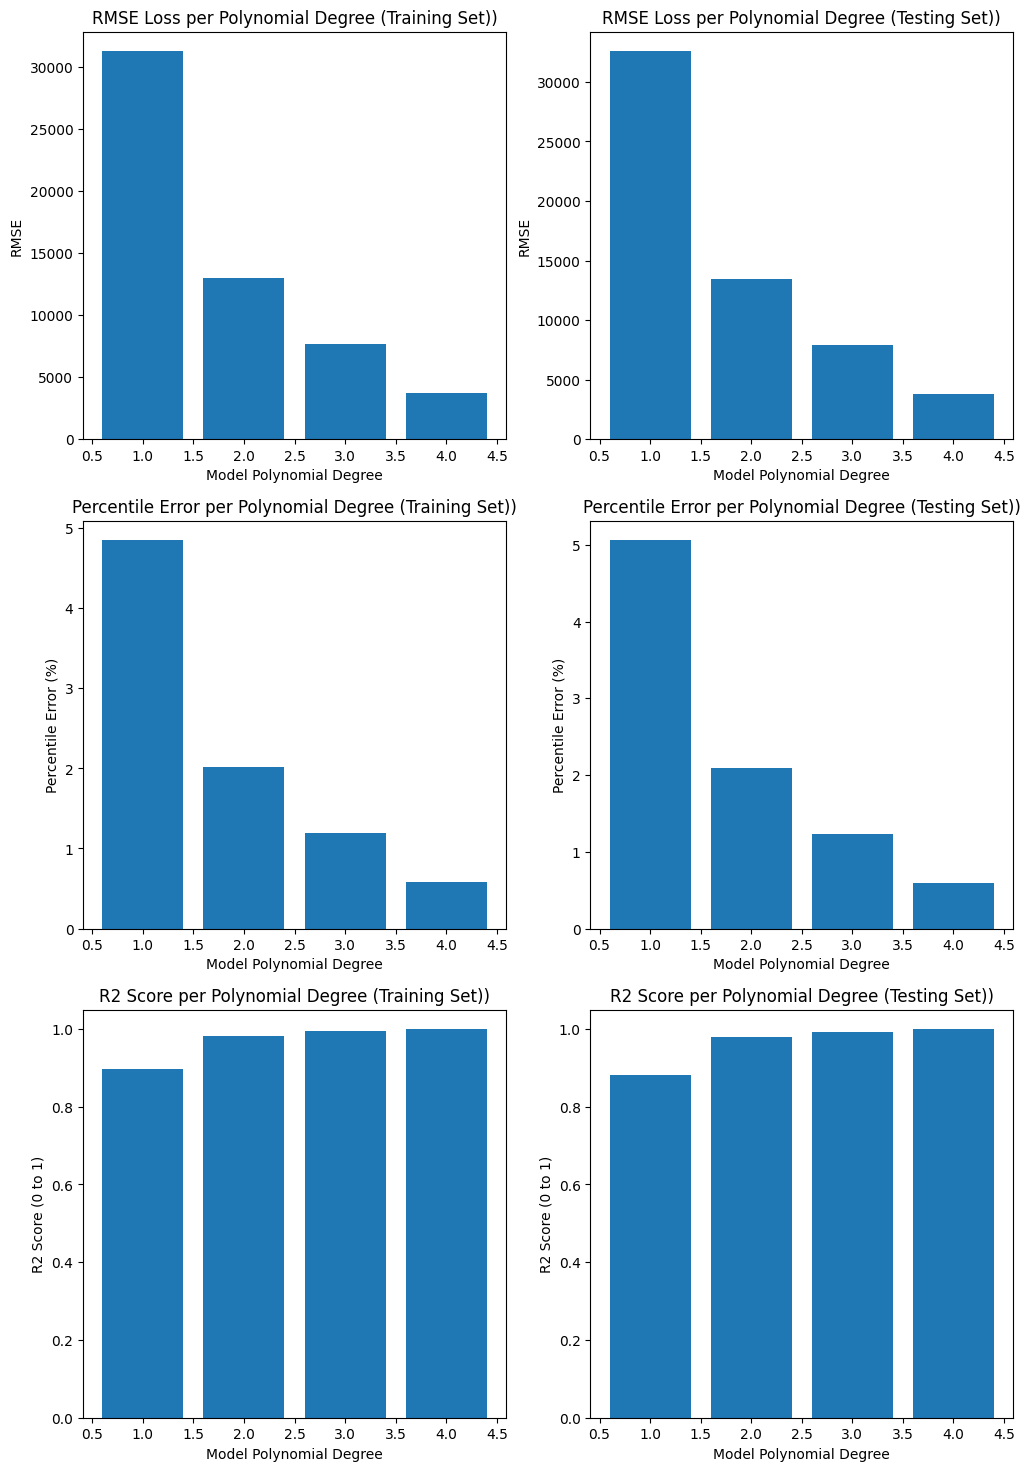

In [189]:

""""""""""""""""""""""""""""""""""""""""""""""""""
"""				LOSS VISUALIATION		   	   """
""""""""""""""""""""""""""""""""""""""""""""""""""

mse_train = []
mse_test = []
mse = [mse_train, mse_test]

fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for i in range(2):
	curr_set = dataset[i]
	curr_mse = mse[i]
	percentile_error = []
	r2_score = []
	curr_Y = Y_set[i]
	dataset_name = "Training Set" if i == 0 else "Testing Set"
	print(f"Set: {dataset_name}")

	for row in range(4):
		model = models[row]
		curr_set_poly = curr_set[row]

		#Make predition on the Training Set
		Y_hat = model.predict_(curr_set_poly)

		#Calculate Loss Using Training Set
		loss = model.rmse_(curr_Y, Y_hat).flatten()[0]
		
		print(f"Model Degree {degrees[row]}: {loss}")

		#Add the result to mse_train
		curr_mse.append(loss)

		#Calculate the percentile error or the loss
		per_error = model.percentile_error_(loss.astype(float), Y)
		percentile_error.append(per_error)

		#Calculate the r2_score
		score = model.r2_score_(curr_Y, Y_hat)
		r2_score.append(score)


	#Plot the loss for each model prediction on the training set
	axes[0, i].bar(degrees, curr_mse)
	axes[0, i].set_title(f"RMSE Loss per Polynomial Degree ({dataset_name}))")
	axes[0, i].set_xlabel("Model Polynomial Degree")
	axes[0, i].set_ylabel("RMSE")

	#Plot the percentile error per Model
	axes[1, i].bar(degrees, percentile_error)
	axes[1, i].set_title(f"Percentile Error per Polynomial Degree ({dataset_name}))")
	axes[1, i].set_xlabel("Model Polynomial Degree")
	axes[1, i].set_ylabel("Percentile Error (%)")

	#Plot the R2_score per Model
	axes[2, i].bar(degrees, r2_score)
	axes[2, i].set_title(f"R2 Score per Polynomial Degree ({dataset_name}))")
	axes[2, i].set_xlabel("Model Polynomial Degree")
	axes[2, i].set_ylabel("R2 Score (0 to 1)")

plt.show()

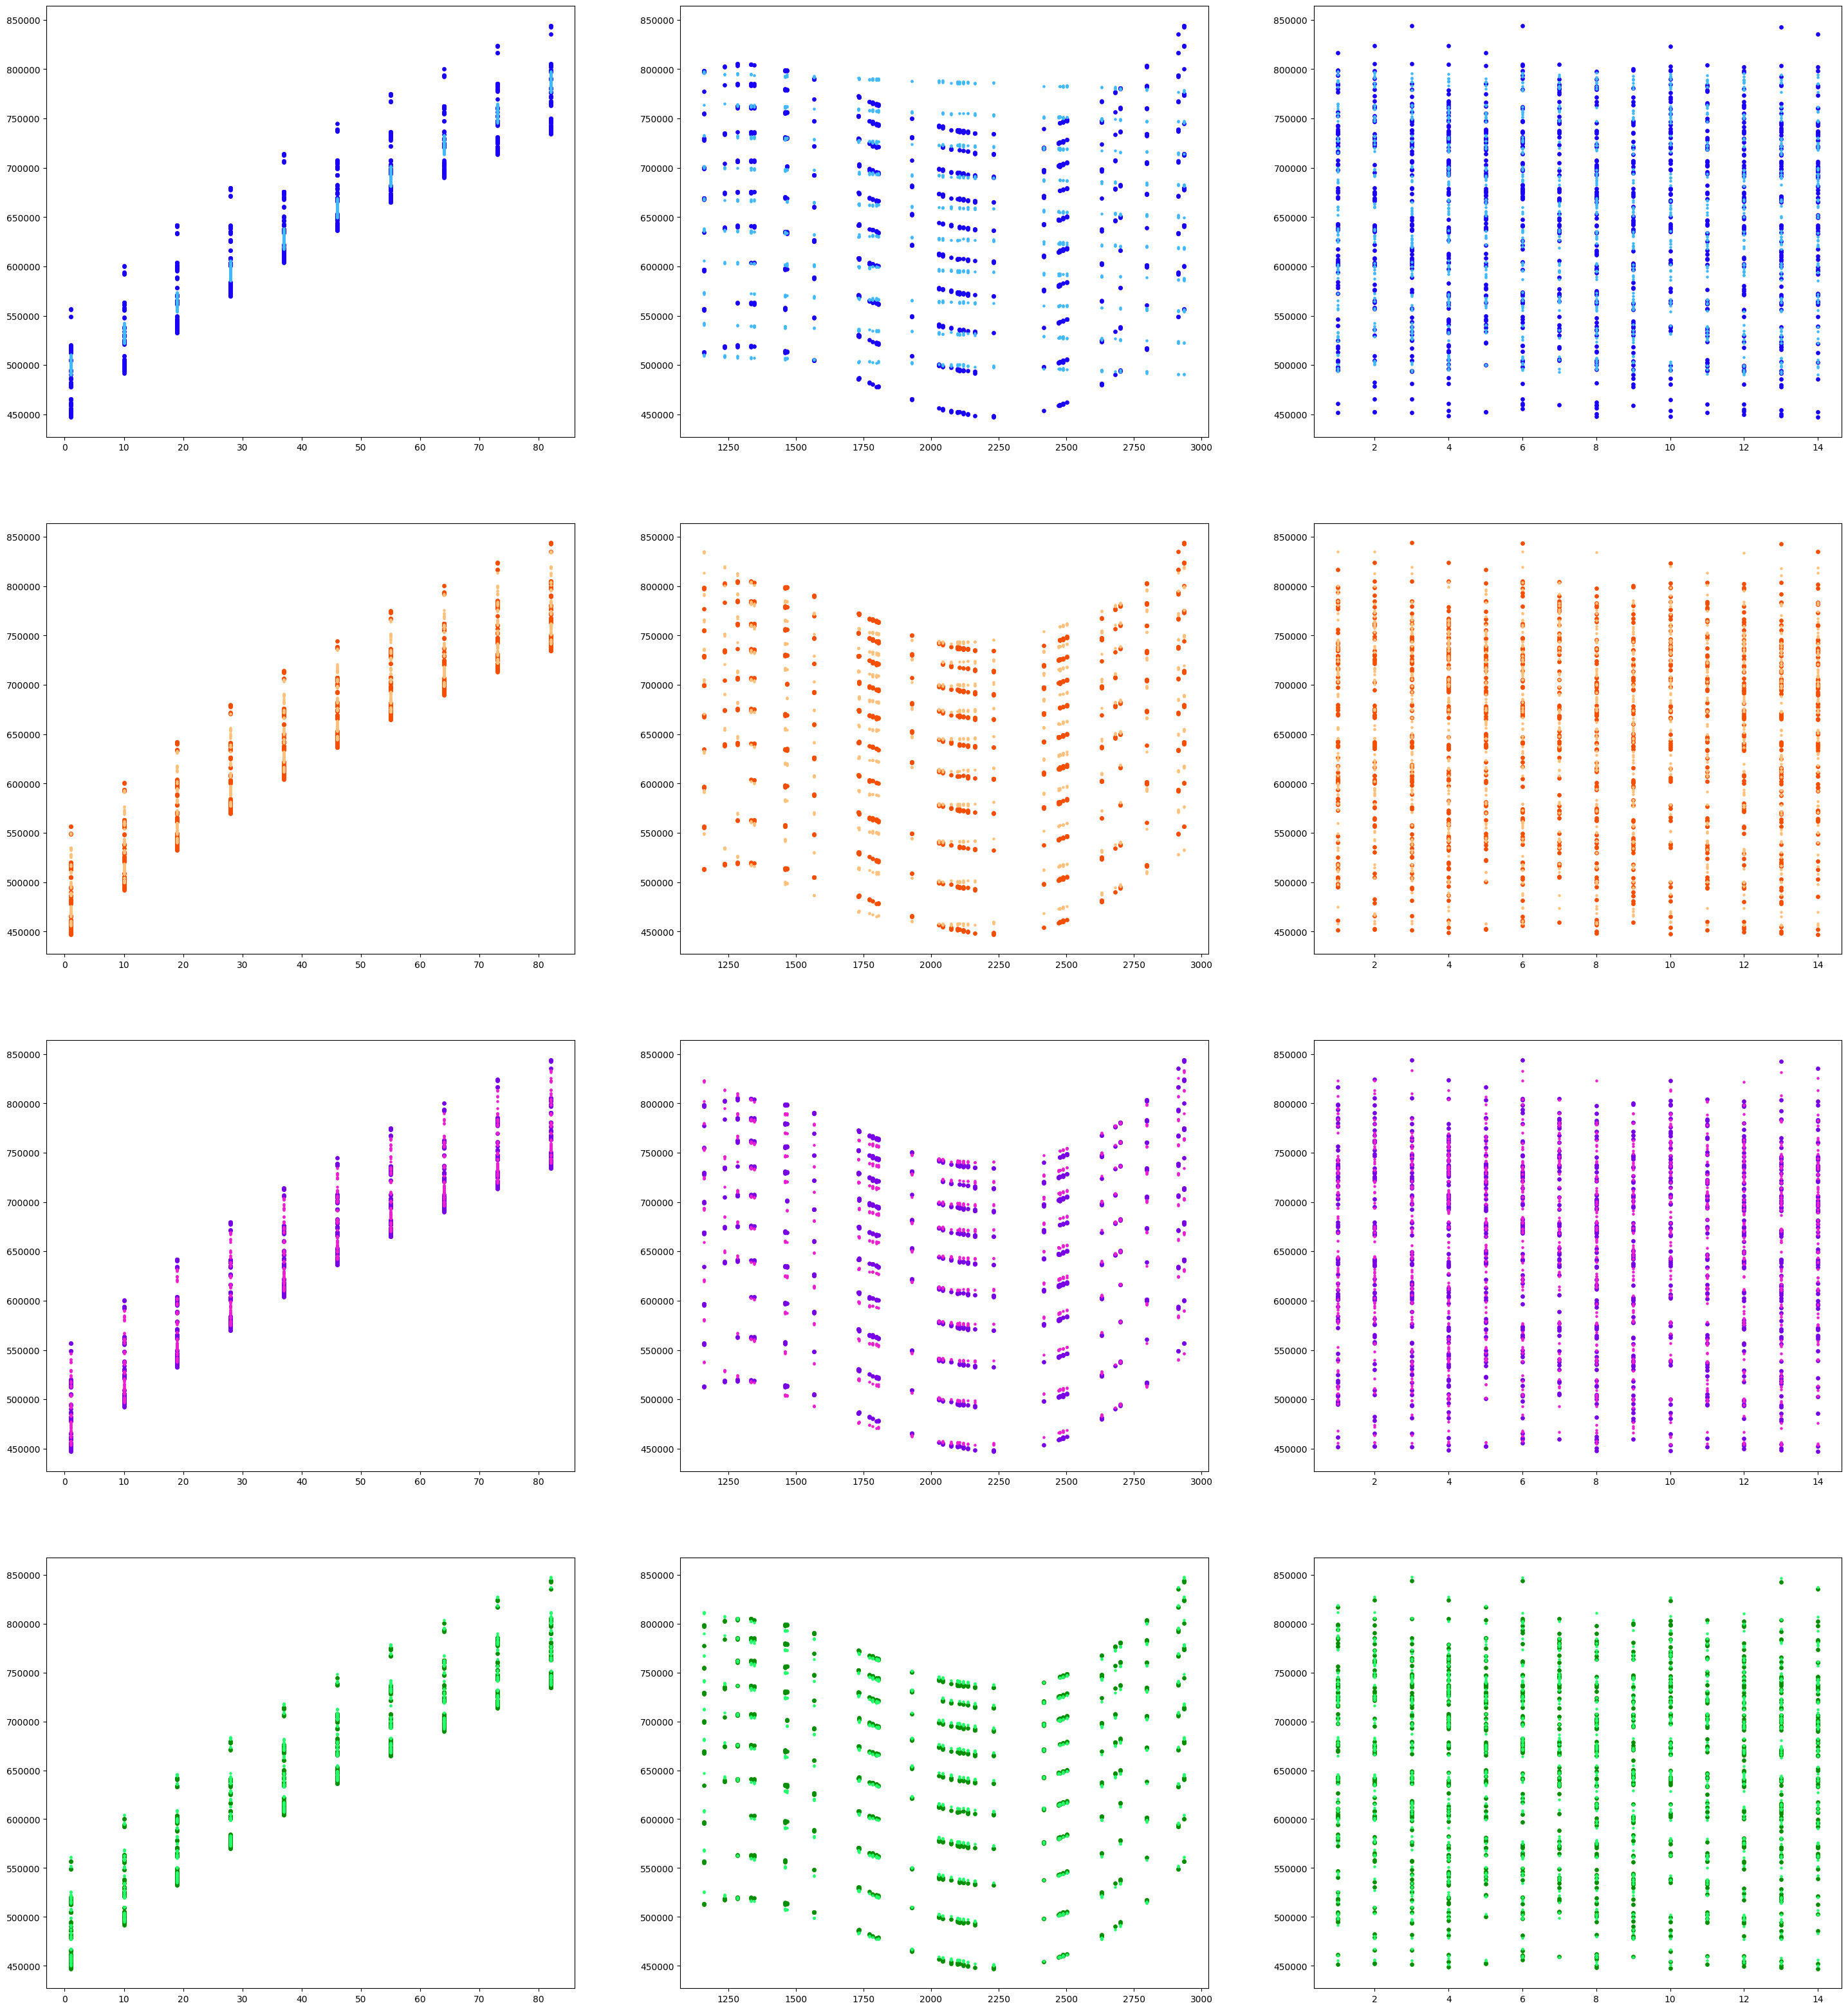

In [111]:
""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""				PREDICTION CLOUD VISUALIATION		 """
""""""""""""""""""""""""""""""""""""""""""""""""""""""""

#Plot Cloud Prediction per model per features (excluding polynomial artificial features)
fig, axes = plt.subplots(4, 3, figsize=(36, 40))

for row in range(4):
	model = models[row]

	curr_test_set = test_set[row]
	y_hat = model.predict_(curr_test_set)

	#Make a prediction on the testing set
	color_labeled = colors_data_1[row]
	color_predict = colors_data_2[row]

	for col in range(3):
		curr_X_test = X_test[:, col]
		#Plot the Labeled Dataset Point
		axes[row, col].scatter(curr_X_test, Y_test, s=15, color=color_labeled)
		axes[row, col].scatter(curr_X_test, y_hat, s=5, color=color_predict)

		

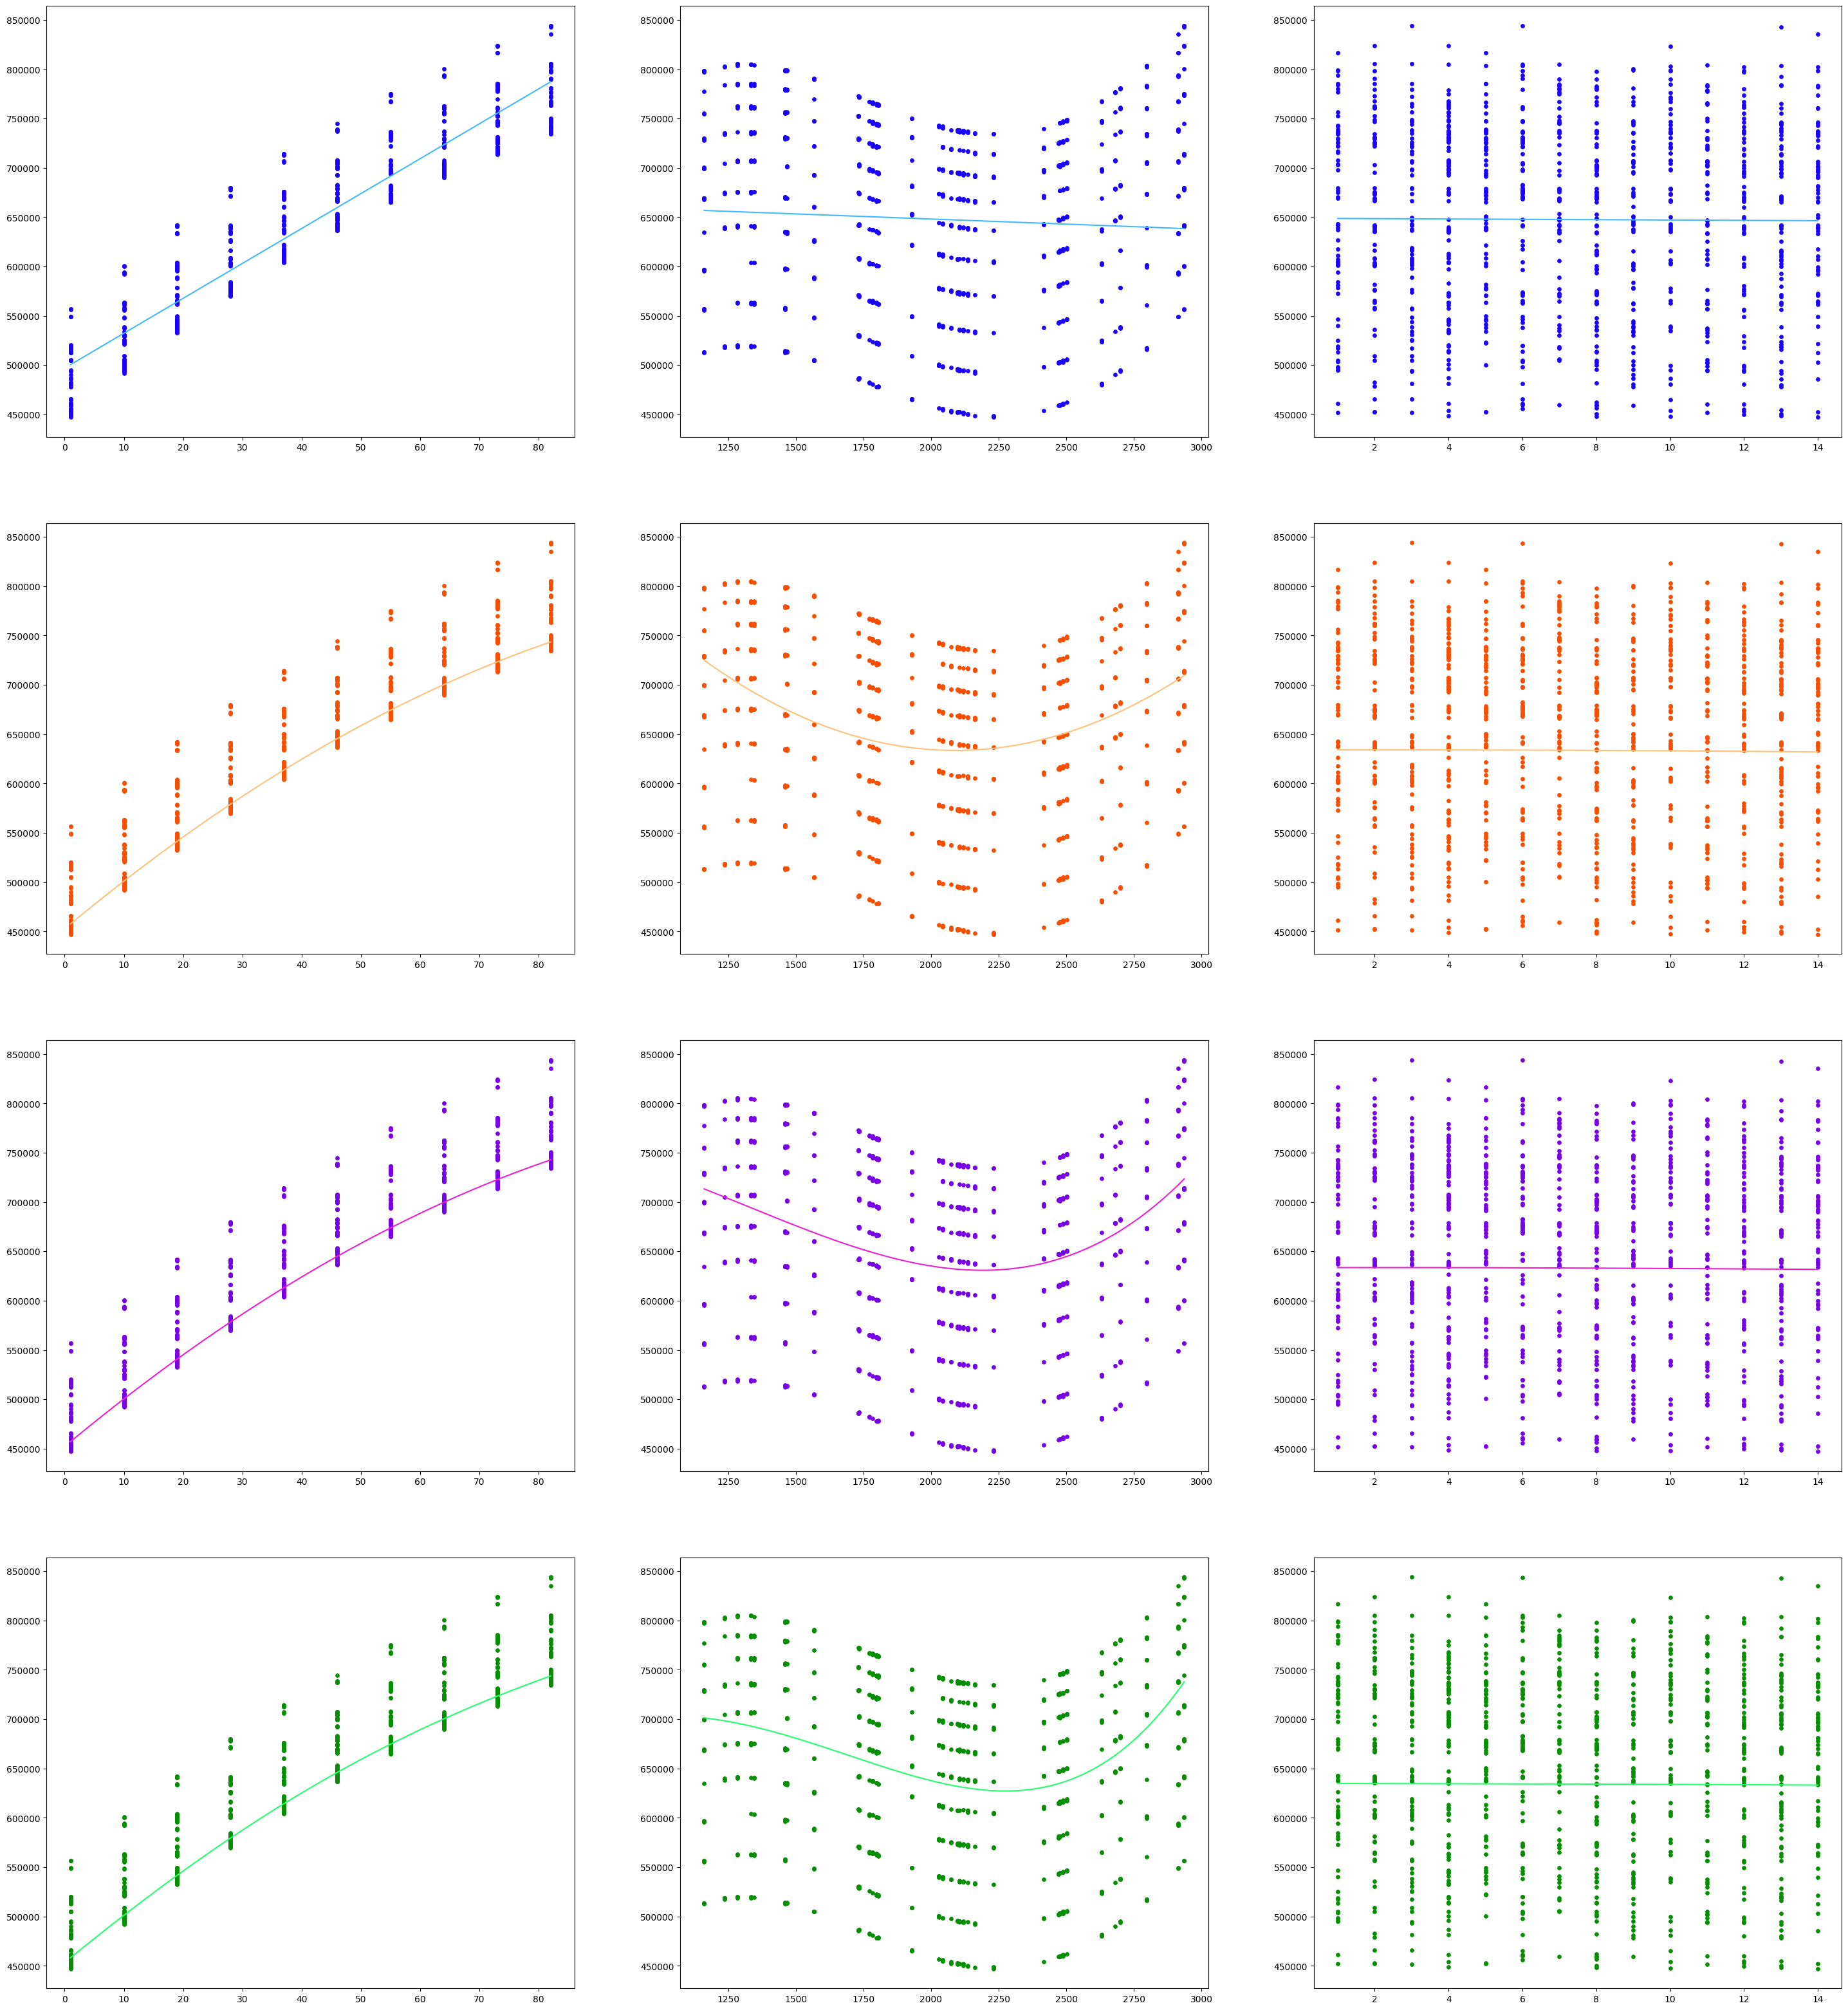

In [112]:
""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""				PREDICTION PLOT VISUALIATION		 """
""""""""""""""""""""""""""""""""""""""""""""""""""""""""

#Save the mean of each Features
weight_mean = X_test[:, 0].mean()
dist_mean = X_test[:, 1].mean()
time_mean = X_test[:, 2].mean()

#Create Array Features (200 constants values)
const_weight = np.full((200, 1), weight_mean)
const_dist = np.full((200, 1), dist_mean)
const_time = np.full((200, 1), time_mean)

#Create continues Array Features (200 ordered variables) 
continues_weight = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 200).reshape(-1, 1)
continues_dist = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 200).reshape(-1, 1)
continues_time = np.linspace(X_test[:, 2].min(), X_test[:, 2].max(), 200).reshape(-1, 1)

#Create Three dataset with partial dependance (One Feature is a continous Array, 2 are constant Array)
continues_x_test_weight = np.hstack((continues_weight, const_dist, const_time))
continues_x_test_dist = np.hstack((const_weight, continues_dist, const_time))
continues_x_test_time = np.hstack((const_weight, const_dist, continues_time))

#Group sets
test_set = [continues_x_test_weight, continues_x_test_dist, continues_x_test_time]

#Plot Continuous line Prediction per model per features (excluding polynomial artificial features)
fig, axes = plt.subplots(4, 3, figsize=(36, 40))

for row in range(4): #For Each Model
	
	model = models[row]
	deg = degrees[row]
	color_point = colors_data_1[row]
	color_line = colors_data_2[row]

	for col in range(3): #For Each Feature

		#Get the current test_set
		curr_test_set = test_set[col]

		#Add Polynomial feature to each dataset (weight, dist, time)
		test_set_poly = add_polynomial_features(curr_test_set, deg)

		test_set_poly_scaled, _, _ = model.minmax(test_set_poly, x_mins[row], x_maxs[row])

		#Make a Prediction using each dataset
		y_hat = model.predict_(test_set_poly_scaled)

		#Plot Labeled Dataset point
		axes[row, col].scatter(X_test[:, col], Y_test, s=15, color=color_point)
		axes[row, col].plot(curr_test_set[:, col], y_hat, color=color_line)


